## Import Modules & Dataset

In [1]:
!pip install cartopy
!pip install geopandas
!apt install python3-cartopy
!pip install geoplot

     |████████████████████████████████| 14.4MB 295kB/s 
     |████████████████████████████████| 225kB 40.9MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127694 sha256=f8fd7dab004c8fef68d888c9f122772fb0bcffe03b0b34db3ba8a8e2c64d61f1
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=487a2c6c3f24495a72c72410472222bc05444091ac238dba484a6f0702f3570f
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp
     |████████████████████████████████| 1.0MB 5.4MB/s 
     |████████████████████████████████| 6.5MB 21.7MB/s 
     |████████████████████████████████| 14.8MB 319kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3

In [2]:
!pip install pywaffle
!pip install squarify

     |████████████████████████████████| 532kB 4.3MB/s 


In [3]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 3.4MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=7f5a8f8525fd6a6327f22924beee1339be50435feb9c903083dd104b9c712ded
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [4]:
import cartopy._crs

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import geoplot
import mapclassify
import squarify
from datetime import date
from pywaffle import Waffle
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, chi2
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [6]:
data = pd.read_csv('http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
np.random.seed(0)
data_normaldist = np.random.normal(0, 1, 1000)

In [8]:
data_tips = sns.load_dataset('tips')

In [9]:
data_climate = pd.DataFrame({'time':[6,7,8,9,10],
                              'sunlight':[50,80,100,300,170],
                              'windspeed':[46,98,110,70,150]})

In [10]:
data_subjects = pd.DataFrame({'Maths':10, 'Language':5, 'Sports':7,'Science':8}, 
                             index=['John'])

In [11]:
data_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
data_map['gdp_pp'] = data_map['gdp_md_est'] / data_map['pop_est']       # gdp per person = gdp / population

In [12]:
data_nba = {'Celtics':17, 'Lakers':16, 'Bulls':6, 'Warriors':6, 'Spuirs':5}

In [13]:
data_account = pd.DataFrame(data={'amount':[150000,-35000,-17500,-5000, 103000,-17000]},
                            index=['lottery','mortgage','credit card','party','income','taxes'])

In [14]:
data_iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                        names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [15]:
data_flights = sns.load_dataset('flights')

In [16]:
data_diabetes = load_diabetes()

In [17]:
data_team_mvp = pd.DataFrame({'Team':['Eagles','Bears','Raptors','Hornets','Bees','Lions'],
                              'City':['Rome','Helsinki','Hong Kong','Hong Kong','Rome','Rome'],
                              'Games':[12,15,23,118,21,8],
                              'MVP':['John A','Leo C','Mike K','Raphael P','Bruce A','Mahatma G']})

# Data Characterization



## Local Concentration

In [18]:
print(f"Temperature Mean : {data['temp'].mean()}")      # Average
print(f"Temperature Mode : {data['temp'].mode()}")      # Most frequent value
print(f"Temperature Median : {data['temp'].median()}")  # Middle value

Temperature Mean : 18.88916827852998
Temperature Mode : 0    17.4
1    19.6
dtype: float64
Temperature Median : 19.3


## Dispersion

In [19]:
print(f"Temperature Standard Deviation : {data['temp'].std()}")
print(f"Temperature Variance : {data['temp'].var()}")

Temperature Standard Deviation : 5.806625349573503
Temperature Variance : 33.7168979503096


## Shape

In [20]:
print(f"Temperature Skewness : {data['temp'].skew()}")      # small tail on the left
print(f"Temperature Kurtosis : {data['temp'].kurt()}")      # skinny tall distribution

Temperature Skewness : -0.331172237347285
Temperature Kurtosis : 0.1361655076587991


## Attribute Summary

In [21]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Visualization

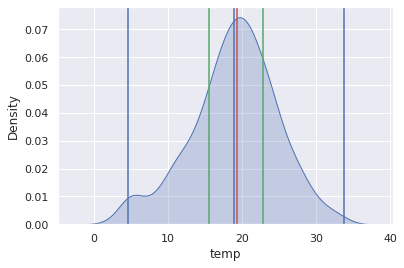

In [22]:
data_summary_temp = data.describe()['temp']

sns.set(color_codes=True)
sns.kdeplot(data['temp'], shade=True)

plt.axvline(data['temp'].mean(), 0, 1,  color='b')
plt.axvline(data['temp'].median(), 0, 1, color='r')
plt.axvline(data_summary_temp['25%'], 0, 1, color='g')
plt.axvline(data_summary_temp['75%'], 0, 1, color='g')

IQR = data_summary_temp['75%'] - data_summary_temp['25%']

upper_outlier = data_summary_temp['75%'] + 1.5*IQR
lower_outlier = data_summary_temp['25%'] - 1.5*IQR

plt.axvline(upper_outlier, 0, 1, color='b')
plt.axvline(lower_outlier, 0, 1, color='b')

# Univariate Analysis 
Involve only a variable


## Distribution Plot

In [23]:
pd.DataFrame(data_normaldist).describe()

,0
count,1000.000000
mean,-0.045257
std,0.987527
min,-3.046143
25%,-0.698420
50%,-0.058028
75%,0.606951
max,2.759355


### Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


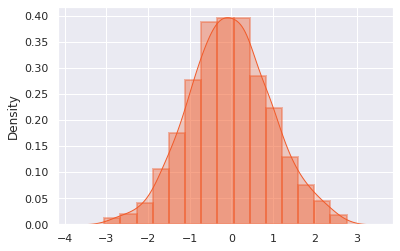

In [24]:
# with density function
plot = sns.distplot(data_normaldist,
                   color='#F15B2A',
                   hist_kws=dict(edgecolor='#F15B2A',linewidth=2),
                   bins=15,
                   kde_kws=dict(shade=True))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


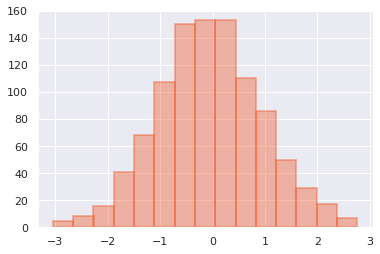

In [25]:
# with absolute values 
plot = sns.distplot(data_normaldist,
                   color='#F15B2A',
                   hist_kws=dict(edgecolor='#F15B2A',linewidth=2),
                   bins=15,
                   kde=False)

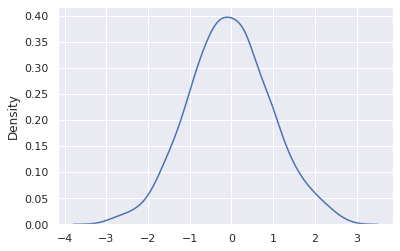

In [26]:
sns.kdeplot(data_normaldist)

### Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


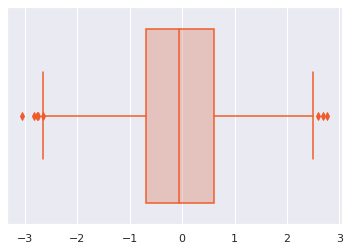

In [27]:
plot = sns.boxplot(data_normaldist,
                   palette=["#F15B2A"])

for e in plot.artists:
    r, g, b, a = e.get_facecolor()
    e.set_facecolor((r, g, b, .3))

for i, artist in enumerate(plot.artists):
    artist.set_edgecolor("#F15B2A")

for j in range(0,6):
    line = plot.lines[j]
    line.set_color("#F15B2A")
    line.set_mfc("#F15B2A")
    line.set_mec("#F15B2A")

### Violin

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


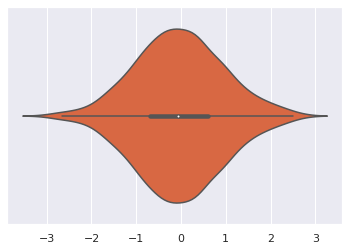

In [28]:
sns.violinplot(data_normaldist,
               palette=["#F15B2A"])



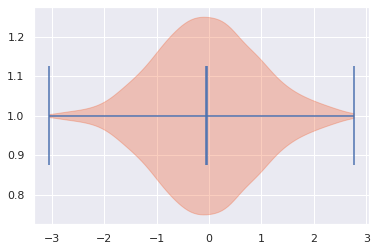

In [29]:
parts = plt.violinplot(data_normaldist, 
                       vert=False,
                       showmeans=True,
                       showmedians=True)

for p in parts['bodies']:
    p.set_facecolor("#F15B2A")
    p.set_edgecolor("#F15B2A")
    p.set_alpha(0.3)

### Strip & Swarm

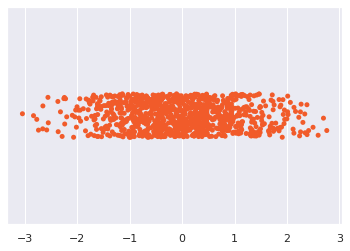

In [30]:
 plot = sns.stripplot(x=data_normaldist,
                      color="#F15B2A")

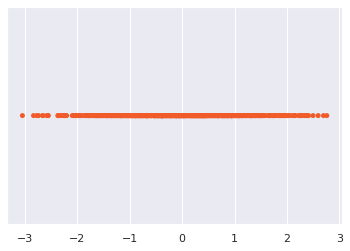

In [31]:
 plot = sns.stripplot(x=data_normaldist,
                      color="#F15B2A",
                      jitter=0)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


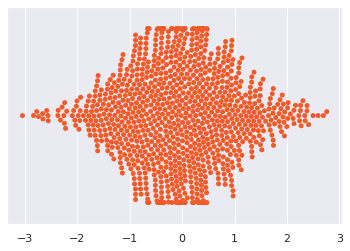

In [32]:
plot = sns.swarmplot(x=data_normaldist,
                      color="#F15B2A")

## Comparison Plot

In [33]:
pd.DataFrame(data_tips).head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Bar Chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


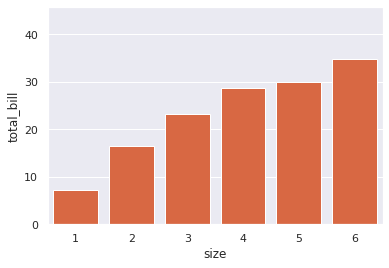

In [34]:
ax = sns.barplot('size', y='total_bill', 
                 data=data_tips, palette=["#F15B2A"],
                 errwidth=0)

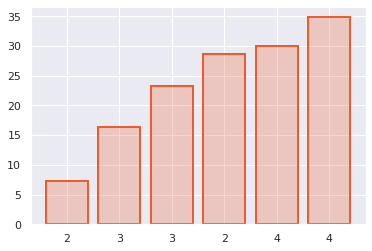

In [35]:
df = data_tips.groupby(by=['size']).mean()['total_bill']

pos = np.arange(len(df.index))
plt.bar(pos,
        df,
        color=(240/256, 90/256, 40/256, 0.25),
        edgecolor="#F15B2A", linewidth=2)
plt.xticks(pos, data_tips['size'])
plt.show()

### Line Graph - Chronological

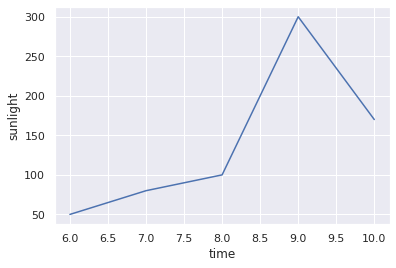

In [36]:
sns.lineplot(x='time', y='sunlight', data=data_climate)

In [37]:
pd.melt(data_climate, ['time'])

,time,variable,value
0,6,sunlight,50
1,7,sunlight,80
2,8,sunlight,100
3,9,sunlight,300
4,10,sunlight,170
5,6,windspeed,46
6,7,windspeed,98
7,8,windspeed,110
8,9,windspeed,70
9,10,windspeed,150


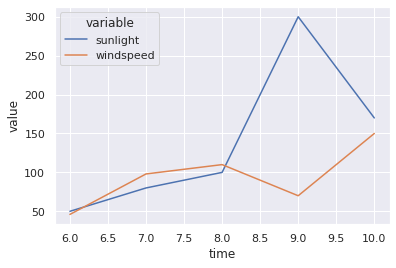

In [38]:
sns.lineplot(x='time', y='value', hue='variable',
             data=pd.melt(data_climate, ['time']))

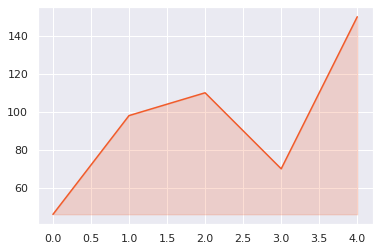

In [39]:
df = data_climate['windspeed']
row = df.shape[0]

plt.plot(df, color="#F15B2A")
plt.fill_between(range(row),
                 df,
                 row*[min(df)],
                 alpha=0.2,
                 color="#F15B2A")

### Lag Plot

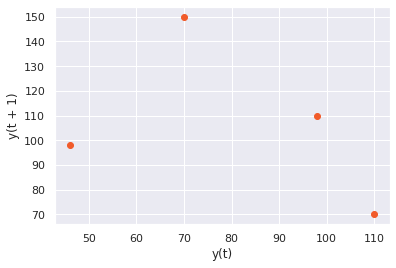

In [40]:
df = data_climate['windspeed']
pd.plotting.lag_plot(df, lag=1, c="#F15B2A")

### Circular Diagram

In [41]:
data_subjects

,Maths,Language,Sports,Science
John,10,5,7,8


Scores input: [10, 5, 7, 8, 10]
Angles input: [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


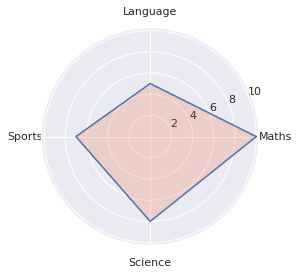

In [42]:
scores = data_subjects.iloc[0].tolist()
scores_input = scores + [scores[0]]
print(f'Scores input: {scores_input}')

angles = [a/4 * 2 * np.pi for a in range(len(scores))]
angles_input = angles + [angles[0]]
print(f'Angles input: {angles_input}')

plt.subplot(111, polar=True)
plt.xticks(angles, data_subjects.keys())
plt.plot(angles_input, scores_input)
plt.fill(angles_input, scores_input,"#F15B2A", alpha=0.2)

In [43]:
angles_input[:-1]

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]

### Cartogram

In [44]:
data_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823


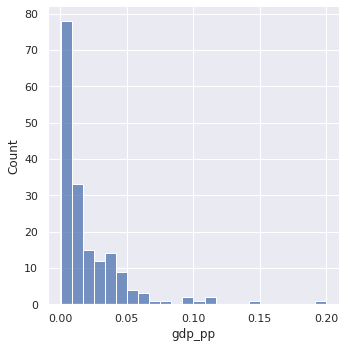

In [45]:
sns.displot(data_map['gdp_pp'])

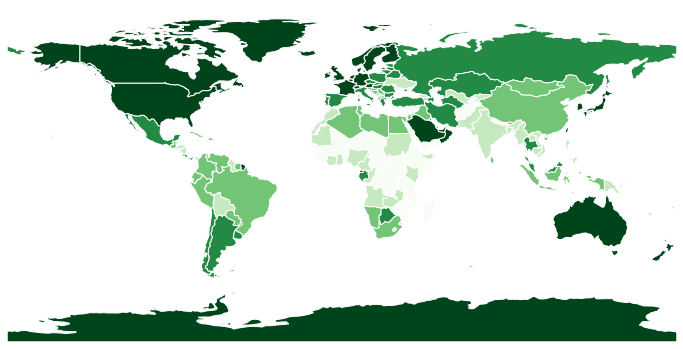

In [46]:
scheme = mapclassify.Quantiles(data_map['gdp_pp'], k=5)
geoplot.choropleth(data_map, hue='gdp_pp', scheme=scheme,
                   cmap='Greens', figsize=[12,8])

## Composition Plot

### Pie Chart

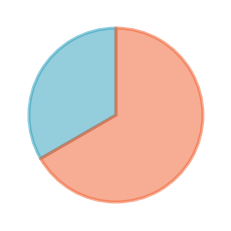

In [47]:
data = [15,30]
colors=['#2A9FBC','#F15B2A']

wedges, texts = plt.pie(data, startangle=90,
        colors=colors,
        wedgeprops={'linewidth':3, 'alpha':0.5})

for i, w in enumerate(wedges):
    w.set_edgecolor(colors[i])

### Waffle

In [48]:
data_nba

{'Bulls': 6, 'Celtics': 17, 'Lakers': 16, 'Spuirs': 5, 'Warriors': 6}

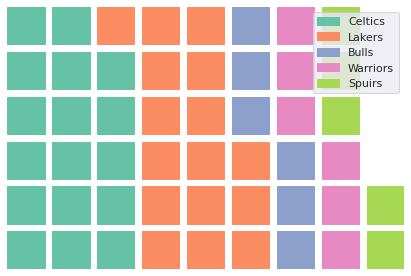

In [49]:
p = plt.figure(FigureClass=Waffle,
           rows=6,
           values=data_nba)

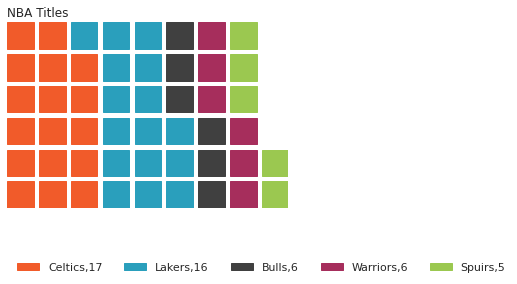

In [50]:
p = plt.figure(FigureClass=Waffle,
           rows=6,
           values=data_nba,
           colors=('#F15B2A','#2A9FBC','#404040','#A62E5C','#9BC850'), #('#983D3D','#232066','#DCB732')
           title={'label':'NBA Titles', 'loc':'left'},
           labels=["{0},{1}".format(k, v) for k, v in data_nba.items()],
           legend={'loc':'lower left', 'bbox_to_anchor':(0,-0.4),'ncol':len(data_nba), 'framealpha':0},
           figsize=(8, 4))

### Tree Map

In [51]:
label = data_nba.keys()
sizes = data_nba.values()

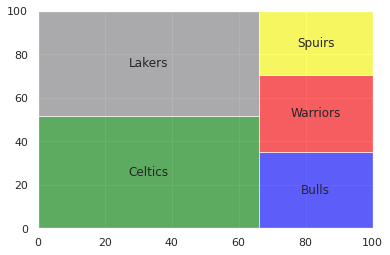

In [52]:
squarify.plot(sizes=sizes, label=label,
              color=['green','grey','blue','red', 'yellow'], alpha=0.6 )
plt.show()

### Waterfall

In [53]:
 data_account

,amount
lottery,150000
mortgage,-35000
credit card,-17500
party,-5000
income,103000
taxes,-17000


In [54]:
cumsum_begin = data_account['amount'].cumsum().shift(1).fillna(0)
cumsum_begin

lottery             0.0
mortgage       150000.0
credit card    115000.0
party           97500.0
income          92500.0
taxes          195500.0
Name: amount, dtype: float64

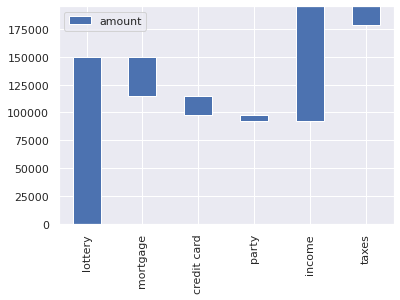

In [55]:
data_account.plot(kind='bar',
                 stacked=True,
                 bottom=cumsum_begin)

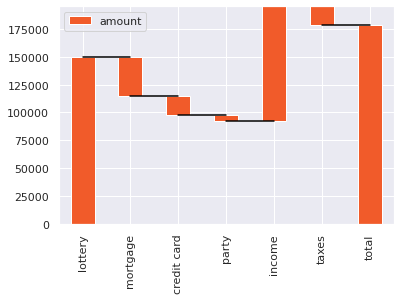

In [56]:
data_account.loc['total'] = 0
data_account.loc['total'] = data_account.sum()['amount']
cumsum_begin.loc['total'] = 0

fig = data_account.plot(kind='bar',
                 stacked=True,
                 bottom=cumsum_begin,
                 color='#F15B2A')

cumsum_begin.loc['total'] = data_account[:-1].sum()['amount']
h_lines = cumsum_begin.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3] = np.nan

fig.plot(h_lines.index, h_lines.values, 'black')

## Hypothesis Testing

In [57]:
 data_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
data_setosa = data_iris[data_iris['class'] == 'Iris-setosa']
data_versicolor = data_iris[data_iris['class'] == 'Iris-versicolor']
data_virginica = data_iris[data_iris['class'] == 'Iris-virginica']
data_setosa.reset_index(inplace=True)
data_versicolor.reset_index(inplace=True)
data_virginica.reset_index(inplace=True)

### Hypothesis 1
Null Hypothesis: setosa & versicolor has same sepal width

In [59]:
# T-test

stats.ttest_ind(data_setosa['sepal_width'], data_versicolor['sepal_width'])
# p-value ~ 0, so null hypothesis is rejected

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [60]:
# ANOVA test

stats.f_oneway(data_setosa['sepal_width'],
               data_virginica['sepal_width'],
               data_versicolor['sepal_width'])
# p-value ~ 0, so at least one of the claasses are different

F_onewayResult(statistic=47.36446140299383, pvalue=1.3279165184572065e-16)

# Multivariate Analysis
Involve multiple variables

## Relationship Plot

In [61]:
data_tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
88,24.71,5.85,Male,No,Thur,Lunch,2
75,10.51,1.25,Male,No,Sat,Dinner,2
157,25.00,3.75,Female,No,Sun,Dinner,4
0,16.99,1.01,Female,No,Sun,Dinner,2
136,10.33,2.00,Female,No,Thur,Lunch,2


### Covariance

In [62]:
np.cov(data_tips['total_bill'], data_tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [63]:
data_tips.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


### Correlation

In [64]:
np.corrcoef(data_tips['total_bill'], data_tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [65]:
data_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


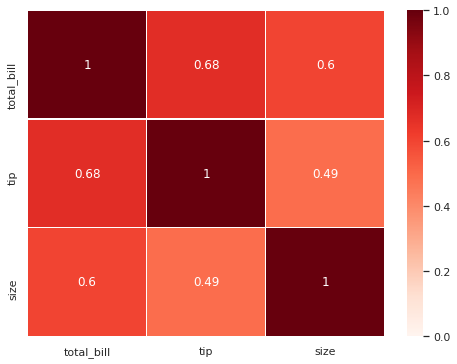

In [66]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data_tips.corr(), ax=ax,
            vmin=0, vmax=1,
            cmap="Reds", linewidths=0.1,
            annot=True)

### Scatter Plot

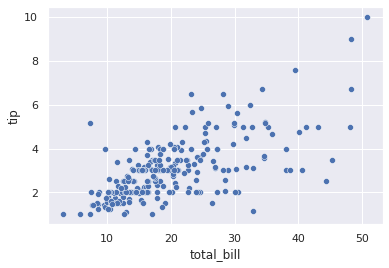

In [67]:
sns.scatterplot(x='total_bill', y='tip', data=data_tips)

### Bubble Plot

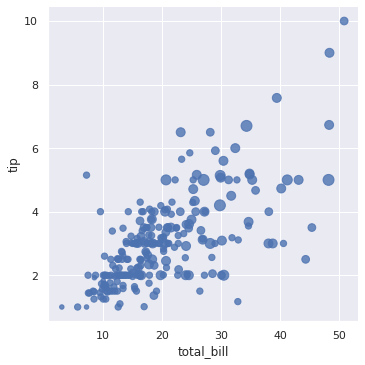

In [68]:
sns.lmplot(x='total_bill', y='tip', data=data_tips,
           scatter_kws={'s':data_tips['size']*20},      # enlarge bubble points
           fit_reg=False)

## Distribution Plot

### Scatter Plot

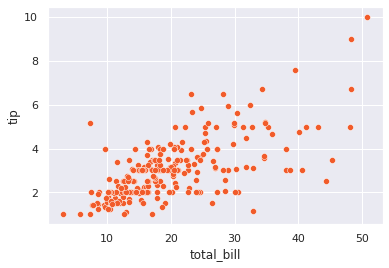

In [69]:
sns.scatterplot(x='total_bill', y='tip', data=data_tips,
                color="#F15B2A")

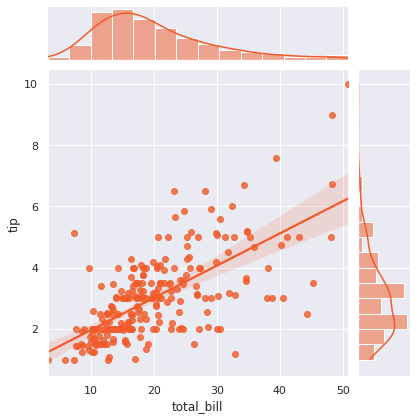

In [70]:
sns.jointplot(x='total_bill', y='tip', data=data_tips,
                color="#F15B2A", kind='reg')

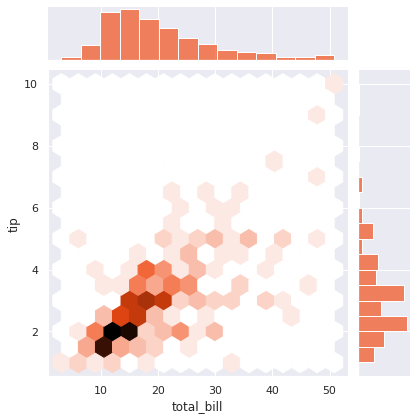

In [71]:
sns.jointplot(x='total_bill', y='tip', data=data_tips,
                color="#F15B2A", kind='hex')

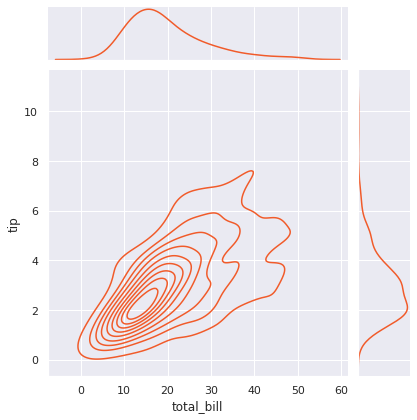

In [72]:
sns.jointplot(x='total_bill', y='tip', data=data_tips,
                color="#F15B2A", kind='kde')

### 3D Diagram

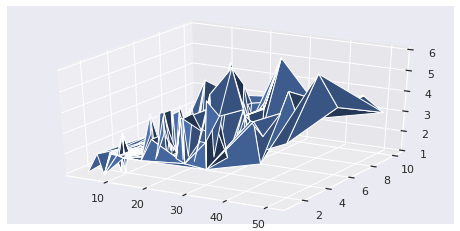

In [73]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca(projection='3d')

ax.plot_trisurf(data_tips['total_bill'], data_tips['tip'], data_tips['size'])
#ax.bar3d(data_tips['total_bill'], data_tips['tip'], np.zeros(len(data_tips['size'])),1 ,1, data_tips['size'])

### Boxplots

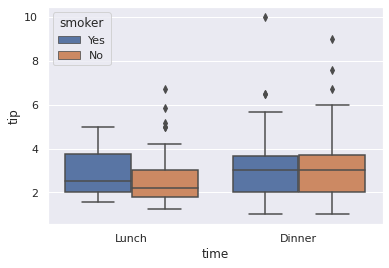

In [74]:
sns.boxplot(x='time', y='tip', hue='smoker', data=data_tips)

### Violin


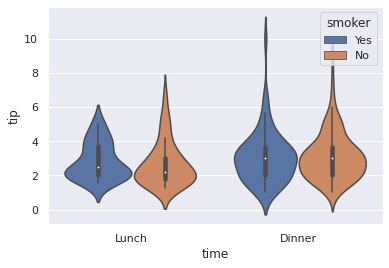

In [75]:
sns.violinplot(x='time', y='tip', hue='smoker', data=data_tips)

## Comparison PLot

### Strip & Bar


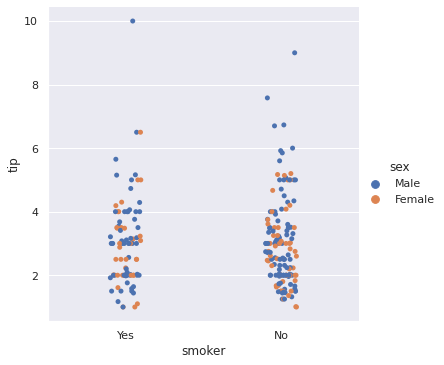

In [76]:
sns.catplot(x='smoker', y='tip', hue='sex', data=data_tips)

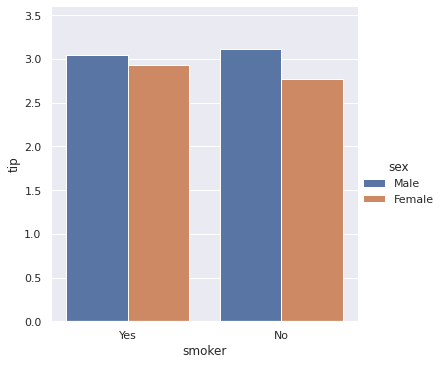

In [77]:
sns.catplot(x='smoker', y='tip', hue='sex', data=data_tips, kind='bar', errwidth=0)

### Heatmap

In [78]:
df = data_flights.pivot('month', 'year', 'passengers')
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


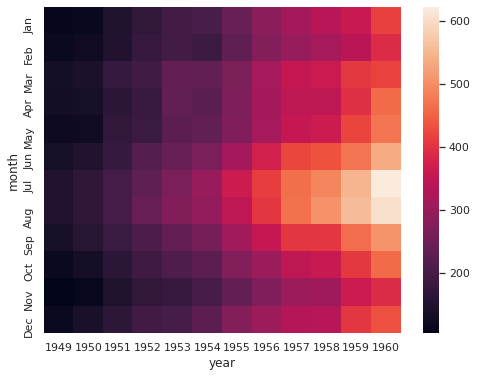

In [79]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df)

### Cartogram

In [80]:
data_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.014316
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.016512
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.009756
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.035766


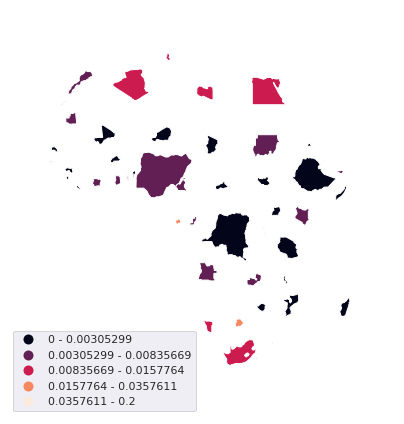

In [81]:
scheme = mapclassify.Quantiles(data_map['gdp_pp'], k=5)
geoplot.cartogram(data_map[data_map['continent'] == 'Africa'],
                  scale='pop_est', hue='gdp_pp',
                  scheme=scheme,
                  legend=True, legend_var='hue', 
                  limits=(0.2, 1), figsize=(7,8))

## Composition Plot

In [82]:
x = range(1,6)
y = [[1,4,6,8,9],[2,2,7,10,12],[2,8,5,10,6]]
labels = ['A','B','C']

### Stacked Area

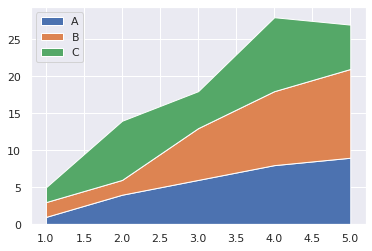

In [83]:
plt.stackplot(x, y, labels=labels, baseline='zero')
plt.legend(loc='upper left')

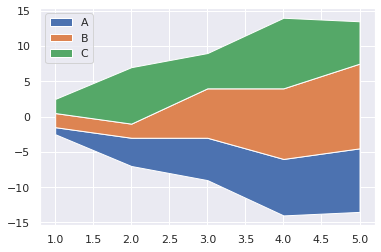

In [84]:
plt.stackplot(x, y, labels=labels, baseline='sym')
plt.legend(loc='upper left')

### Bar

<BarContainer object of 5 artists>

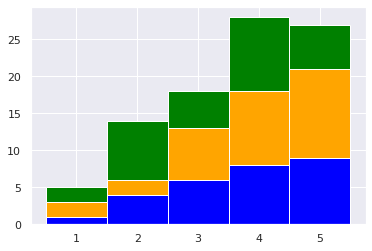

In [85]:
plt.bar(x,y[0], bottom=0, color='blue', edgecolor='white', width=1)
plt.bar(x,y[1], bottom=y[0], color='orange', edgecolor='white', width=1)
plt.bar(x,y[2], bottom=np.add(y[0], y[1]), color='green', edgecolor='white', width=1)

### Tornado

In [86]:
df = data_tips.copy()
df.loc[df['sex']=='Male', 'size'] = -df.loc[df['sex']=='Male', 'size']
bars_order = df['day'].unique()[::-1]

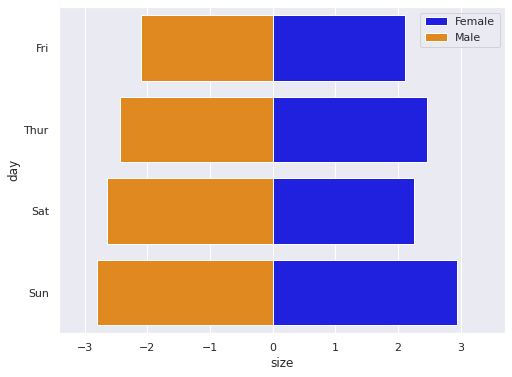

In [87]:
fig = plt.figure(figsize=(8, 6))
for c, group in zip (['blue', 'darkorange'], df['sex'].unique()):
    sns.barplot(x='size', y='day', data=df.loc[df['sex']==group, :],
                order=bars_order, color=c,
                label=group, errwidth=0)
plt.legend(loc='upper right')

# Feature Extraction

## PCA

(0.6829999999999998, 53.197, 0.55, 10.45)

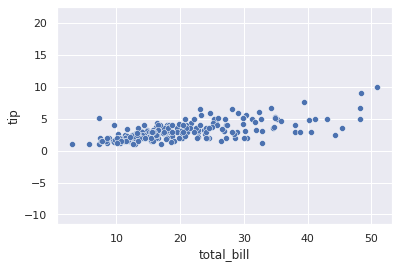

In [88]:
sns.scatterplot(x='total_bill', y='tip', data=data_tips)
plt.axis('equal')

In [89]:
# scaled data by mean and std, z = (x - u) / s
arr = data_tips[['total_bill', 'tip']].values
arr = StandardScaler().fit_transform(arr)
arr[0:5]

array([[-0.31471131, -1.43994695],
       [-1.06323531, -0.96920534],
       [ 0.1377799 ,  0.36335554],
       [ 0.4383151 ,  0.22575414],
       [ 0.5407447 ,  0.4430195 ]])

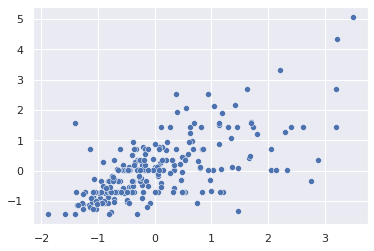

In [90]:
sns.scatterplot(x=arr[:,0], y=arr[:,1])

In [91]:
pca = PCA(n_components=2)
pca.fit(arr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
# 83.8% of data is explained by first PC

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[1.68263013 0.32560032]
[0.83786705 0.16213295]


(-2.150227245218911,
 3.7607486596013318,
 -1.7730871743831187,
 5.396669728157747)

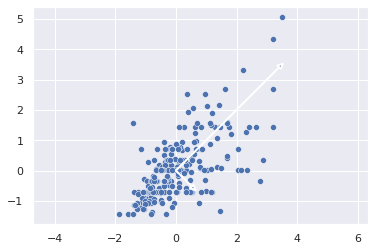

In [93]:
sns.scatterplot(x=arr[:,0], y=arr[:,1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * length * 3
    ax = plt.gca()
    ax.annotate('', pca.mean_ + v, pca.mean_, 
                arrowprops=dict(arrowstyle='-|>', linewidth=2, shrinkA=0, shrinkB=0), color='Reds')
    
plt.axis('equal')


## Factor Analysis

Sklearn version


In [94]:
df = data_tips[['total_bill','tip','size']]
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [95]:
fa = FactorAnalysis(n_components=3, random_state=42).fit(df.values)

In [96]:
pd.DataFrame(fa.components_, columns=df.columns)
# third factor is not needed as first two factors have concluded all information from all 3 variables

,total_bill,tip,size
0,8.827560,0.940874,0.572776
1,-0.054868,0.301503,0.195224
2,-0.000000,0.000000,-0.000000


Factor analyzer version

In [97]:
chi2_val, p_val = calculate_bartlett_sphericity(df)
chi2_val, p_val 
# p_val is close to 0, the assumption of 0 perfect multicollinearity among variables is true, so we can perform factor analysis

(261.985109009744, 8.331146616424265e-57)

In [98]:
kmo, kmo_model = calculate_kmo(df)
kmo_model
# measure of how suited the data for Factor Analysis
# 0.00 to 0.49 unacceptable.
# 0.50 to 0.59 miserable.
# 0.60 to 0.69 mediocre.
# 0.70 to 0.79 middling.
# 0.80 to 0.89 meritorious.
# 0.90 to 1.00 marvelous.

0.6788963894769229

\# of factor(s) selection


In [99]:
faz = FactorAnalyzer()
faz.set_params(n_factors=2, rotation=None)  # 3 factors (0,1,2)
faz.fit(df) 

ev, vector = faz.get_eigenvalues()
ev

# rule of thumb - count eigenvalue > 1, i.e. 1 in this case

array([2.17882968, 0.5191269 , 0.30204342])

In [100]:
faz2 = FactorAnalyzer()
faz2.set_params(n_factors=3, rotation='varimax')   
faz2.fit(df) 

faz2.loadings_
# row: total_bill, tip, size; column: Factor1,2,3
# seems like weightages in 3rd factor have relatively smaller magnitude compared to 1 and 2

array([[0.64019249, 0.59708387, 0.1041961 ],
       [0.68433233, 0.39729109, 0.00396937],
       [0.3558066 , 0.6185995 , 0.01127337]])

In [101]:
faz2.get_eigenvalues()
# original (before rotation) and common factor for each of the 3 factors

(array([2.17882968, 0.5191269 , 0.30204342]),
 array([1.8324816 , 0.07501975, 0.0052685 ]))

In [102]:
faz2.get_factor_variance()
# row: loadings, Porportion Variance, Cumulative Variance; column: Factor1,2,3
# third factor almost contributed nothing to explaining variance in data

(array([1.00475549, 0.89701469, 0.01099967]),
 array([0.3349185 , 0.2990049 , 0.00366656]),
 array([0.3349185 , 0.63392339, 0.63758995]))

## Clustering

Text(0, 0.5, 'sepal_width')

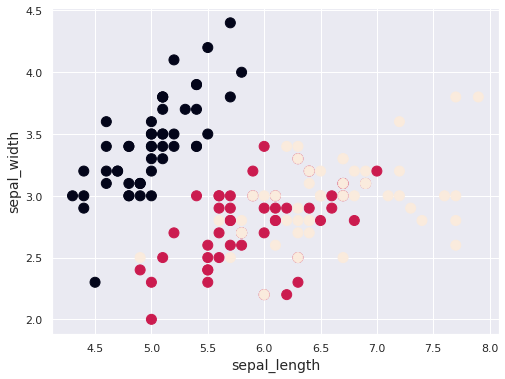

In [103]:
# dataset
X = data_iris[['sepal_length','sepal_width']]
y_label = data_iris['class']
le = LabelEncoder()
y = le.fit_transform(y_label)

fig = plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, s=100)
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)

#### K-means (Non-Hierarchical)

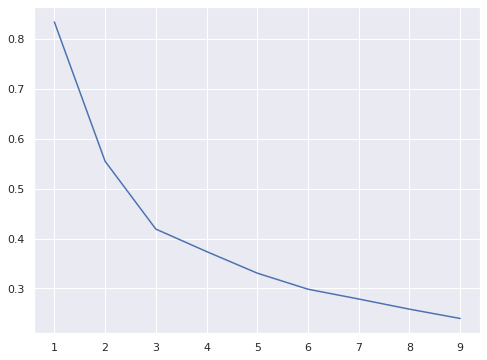

In [104]:
# Find K with elbow method
MIN_K, MAX_K = 1, 10
mean_dist = []

for k in range(MIN_K, MAX_K):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    mean_dist.append(sum(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

fig = plt.figure(figsize=(8,6))
plt.plot(range(MIN_K, MAX_K), mean_dist)
# 3 looks just right, the rest doest change the slope significantly

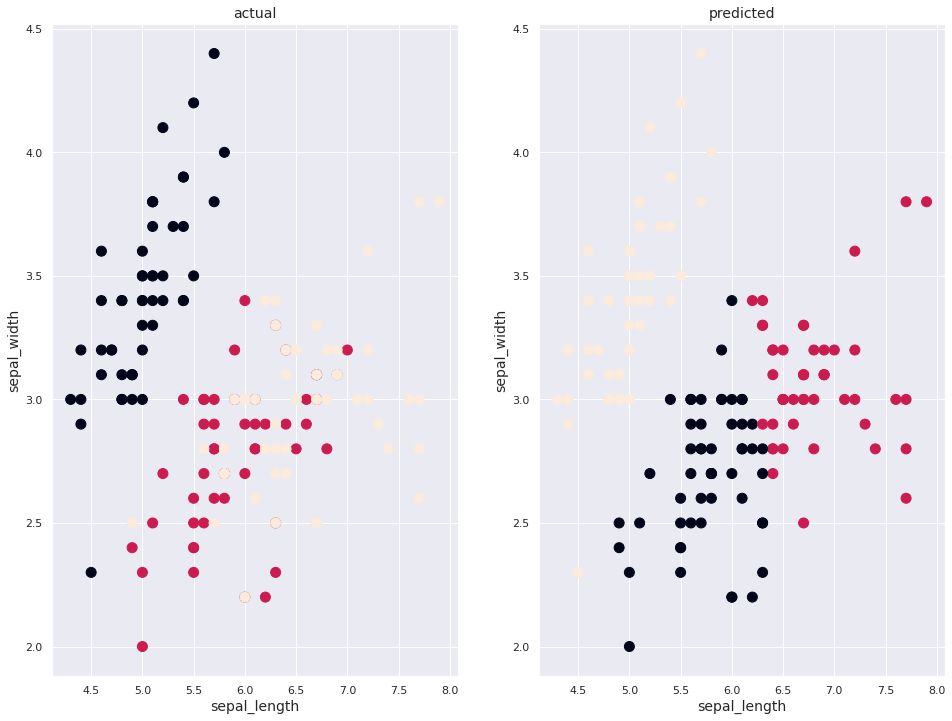

In [105]:
# Fit K-Means
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)



fig, axes = plt.subplots(1, 2, figsize=(16, 12))
for ax, label, title in zip(axes, [y, km.labels_], ['actual','predicted']):
    ax.scatter(X.iloc[:,0],X.iloc[:,1], c=label, s=100)
    ax.set_xlabel('sepal_length', fontsize=14)
    ax.set_ylabel('sepal_width', fontsize=14)
    ax.set_title(title, fontsize=14)

# the cluster centroids are found similar to the actual results
# for prediction model, kNN should be used instead. KMeans is used for exploring undefined grouping.

#### Dendogram (Hierarchical)

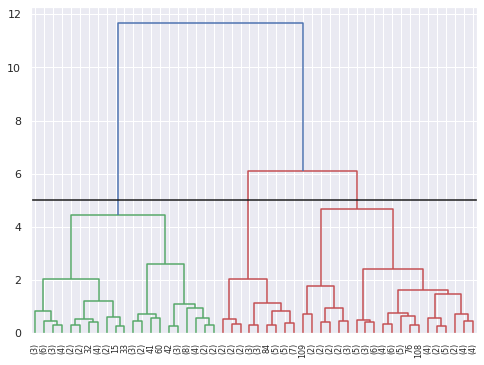

In [106]:
L = linkage(X, 'ward')

plt.figure(figsize=(8,6))
dendrogram(L, truncate_mode='lastp', p=50)     # p: # observations
plt.axhline(y=5, c='k')

# at distance = 5, 3 clusters are observed. Distance will have to be selected by user

# Feature Selection

In [107]:
X = data_iris.iloc[:, :-1]
y_label = data_iris.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y_label)

## Variance Threshold

In [108]:
f_sel = VarianceThreshold(threshold=0.3)
X_new = f_sel.fit_transform(X)
print(f'Old X : {X[:1]}')
print(f'New X : {X_new[:1]}')

# sepal width is removed

Old X :    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
New X : [[5.1 1.4 0.2]]


## Correlation

Pearson Corr. x1 & x2 : (0.6811405918134971, 1.9520324398684079e-69)
Pearson Corr. x1 & x3 : (0.03937486620402585, 0.37962586391466446)


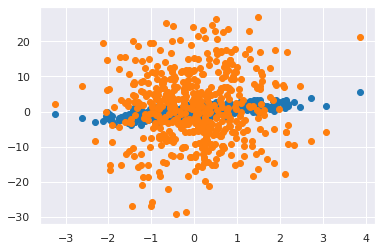

In [109]:
np.random.seed(42)
x1 =  np.random.normal(0,1,500)         # mean, std, samples
x2 = x1 + np.random.normal(0,1,500)
x3 = x1 + np.random.normal(0,10,500)

plt.scatter(x1, x2, color='#1f77b4')        # blue
plt.scatter(x1, x3, color='#ff7f0e')        # orange

print(f'Pearson Corr. x1 & x2 : {pearsonr(x1,x2)}')
print(f'Pearson Corr. x1 & x3 : {pearsonr(x1,x3)}') # (correlation, p-value)

# correlation (linear) : strong - magnitude > 0.7; weak magnitude < 0.3
# p-value: statistically significant - value <= 0.05 (enough sample size)

# in this case, x1 and x2 are moderately correlated linearly

In [110]:
print(f'Pearson Corr. sepal_length & sepal_width : {pearsonr(X.iloc[:, 0],X.iloc[:, 1])}')
print(f'Pearson Corr. sepal_length & petal length: {pearsonr(X.iloc[:, 0],X.iloc[:, 2])}')
print(f'Pearson Corr. sepal_length & petal width : {pearsonr(X.iloc[:, 0],X.iloc[:, 3])}')

# Seems like first feature is highly correlated to 3rd and 4th features

Pearson Corr. sepal_length & sepal_width : (-0.10936924995064937, 0.1827652152713699)
Pearson Corr. sepal_length & petal length: (0.8717541573048713, 1.0384540627941062e-47)
Pearson Corr. sepal_length & petal width : (0.8179536333691635, 2.3148491512728037e-37)


## Mutual Information

In [111]:
print(mutual_info_classif(X, y))
# last two features have more information to predict the target

[0.48451775 0.2006047  0.99280814 0.98327118]


## Chi2

In [112]:
X2 = SelectKBest(chi2, k=2).fit_transform(X, y)     # select 3 most infromative variables
print(f'Old X : {X[:1]}')
print(f'New X : {X2[:1]}')
# last two features have more information to predict the target

Old X :    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
New X : [[1.4 0.2]]


# Feature Engineering

In [113]:
df = pd.DataFrame(data_diabetes.data).copy()
df.columns = data_diabetes.feature_names
df['target'] = data_diabetes.target
df.shape

(442, 11)

### Imputation

In [114]:
THRESHOLD = 0.001

df_NaN = df.copy()
df_NaN['age'][1] = np.NaN       # create null cell
df_NaN.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,NaN,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [115]:
df_NaN.isnull().sum()       # one null value in 'age' column

age       1
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [116]:
df_NaN.columns[df.isnull().sum() > 0]

Index([], dtype='object')

In [117]:
df_NaN['age'].isnull().mean()       # 1 NaN / 442 rows

0.0022624434389140274

In [118]:
# Drop column
df_drop_col = df_NaN[df_NaN.columns[df_NaN.isnull().mean() < THRESHOLD]]
df_drop_col.columns
# age column is droped

Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target'], dtype='object')

In [119]:
# Drop row
df_drop_row = df_NaN.loc[df_NaN.isnull().mean(axis=1) < THRESHOLD]
df_drop_row.head(3)
# second row is dropped

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0


In [120]:
# Fill missing value
df_fill_na = df_NaN.fillna(df_NaN.median())
df_fill_na.head(3)
# second row NaN in 'age' column is replaced with median

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,0.005383,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


## Outliers

In [121]:
df_outlier = df.copy()
df_outlier['age'][1] = 0.2
df_outlier.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,0.200000,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


Standard Deviation

In [122]:
# std policy : outlier = 3 x std away from mean
upper_outlier = df_outlier['age'].mean() + 3*df_outlier['age'].std()
lower_outlier = df_outlier['age'].mean() - 3*df_outlier['age'].std()

df_std_outlier = df_outlier[(df_outlier['age'] > upper_outlier) | (df_outlier['age'] < lower_outlier)]
df_std_outlier       # only 1 outlier in age

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
1,0.2,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.06833,-0.092204,75.0


Quantiles

In [123]:
# Percentile policy : outlier = 1.5 x IQR away from quantile
upper_outlier = df_outlier['age'].quantile(.75)
lower_outlier = df_outlier['age'].quantile(.25)
IQR = upper_outlier - lower_outlier

df_quantile_outlier = df_outlier[(df_outlier['age'] > upper_outlier + 1.5) | 
                 (df_outlier['age'] < lower_outlier)]
df_quantile_outlier     # 111 outlier in age

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062913,-0.034215,101.0
...,...,...,...,...,...,...,...,...,...,...,...
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152.0
429,-0.041840,-0.044642,-0.033151,-0.022885,0.046589,0.041587,0.056003,-0.024733,-0.025952,-0.038357,94.0
436,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## Binning

In [124]:
# prevent overfitting by sacrificing performance
df_binning = df.copy()
df_binning['binned_age'] = pd.cut(df_binning['age'],
                                  bins=[0, 0.01, 0.02, 0.05, 0.09],
                                  labels=['low','mid-low','mid-high','high'])
df_binning.head()  
# those out of binning range are disposed

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,binned_age
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,mid-high
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,NaN
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,high
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,NaN
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,low


## Log Transform

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f5463810>]],
      dtype=object)

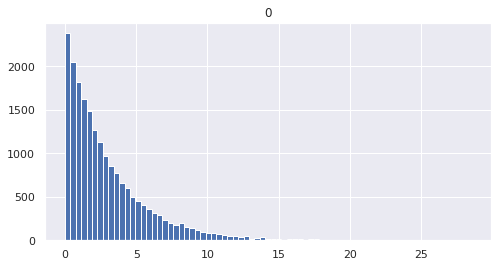

In [125]:
# Handle skewed data
# apply log transform to convert negative value to positive

df_skewd = pd.DataFrame(np.random.exponential(scale=3, size=20000))     
df_skewd.hist(figsize=(8,4), bins=75)
# heavily right skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83f5268f90>]],
      dtype=object)

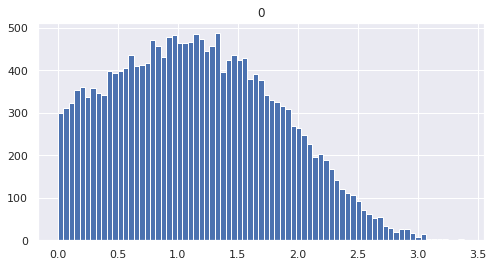

In [126]:
df_skewed_log = (df_skewd + 1).transform(np.log)   # add 1 to remove negative values
df_skewed_log.hist(figsize=(8,4), bins=75)
# more normally distributed

## One-Hot-Encoding

In [127]:
data_team_mvp

,Team,City,Games,MVP
0,Eagles,Rome,12,John A
1,Bears,Helsinki,15,Leo C
2,Raptors,Hong Kong,23,Mike K
3,Hornets,Hong Kong,118,Raphael P
4,Bees,Rome,21,Bruce A
5,Lions,Rome,8,Mahatma G


In [128]:
df_ohe = pd.get_dummies(data_team_mvp['City'])
df_ohe

,Helsinki,Hong Kong,Rome
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


## Group Operations

In [129]:
df_grouped = data_team_mvp.groupby('City')['Games'].sum()
df_grouped

City
Helsinki      15
Hong Kong    141
Rome          41
Name: Games, dtype: int64

In [130]:
data_team_mvp.groupby('City')['Team'].count()

City
Helsinki     1
Hong Kong    2
Rome         3
Name: Team, dtype: int64

In [131]:
data_flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [132]:
data_flights.pivot('month','year','passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


## Feature Split

In [133]:
data_team_mvp['MVP'].str.split(' ').map(lambda x: x[0]) # split and get the first name

0       John
1        Leo
2       Mike
3    Raphael
4      Bruce
5    Mahatma
Name: MVP, dtype: object

## Scaling

In [134]:
df = data_climate.copy()
df

,time,sunlight,windspeed
0,6,50,46
1,7,80,98
2,8,100,110
3,9,300,70
4,10,170,150


Min Max Scaler

In [135]:
scaler = MinMaxScaler()
scaler.fit_transform(df)
# scaled to range of 0 to 1

array([[0.        , 0.        , 0.        ],
       [0.25      , 0.12      , 0.5       ],
       [0.5       , 0.2       , 0.61538462],
       [0.75      , 1.        , 0.23076923],
       [1.        , 0.48      , 1.        ]])

Standardization

In [136]:
scaler = StandardScaler()
scaler.fit_transform(df)
# scale into normal distribution with mean and std of each column

array([[-1.41421356, -1.00875564, -1.37644573],
       [-0.70710678, -0.67250376,  0.09025874],
       [ 0.        , -0.44833584,  0.428729  ],
       [ 0.70710678,  1.79334336, -0.69950521],
       [ 1.41421356,  0.33625188,  1.5569632 ]])

## Date Formating

In [137]:
df = pd.DataFrame({'date':['17-06-1997','19-03-1995']})

In [138]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df

,date
0,1997-06-17
1,1995-03-19


In [139]:
df['date'].dt.year

0    1997
1    1995
Name: date, dtype: int64

In [140]:
df['date'].dt.day_name()

0    Tuesday
1     Sunday
Name: date, dtype: object